In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
train_data = pd.read_csv(r"D:\study\paper\ubiquitination\null_importances_result\train_test\train_ElasticNet_human.csv")
train_data

,label,AA531_293,AA531_297,AA531_298,AA531_299,AA531_300,AA531_322,AA531_323,AA531_325,AA531_332,...,AA531_14005,AA531_14006,AA531_14007,AA531_14008,AA531_14957,AA531_14958,AA531_14960,AA531_14961,AA531_15643,AA531_15648
0,1.0,151.0,-70.0,-13.0,189.0,-70.0,47.0,-72.0,108.0,117.0,...,-52.0,120.0,-66.0,174.0,100.0,-2.0,-7.0,-2.0,67.5,102.0
1,1.0,-38.0,145.0,-20.0,-13.0,-20.0,-54.0,-8.0,47.0,44.0,...,248.0,115.0,-132.0,-97.0,-26.0,62.0,100.0,25.0,123.4,135.2
2,1.0,-70.0,-106.0,145.0,53.0,-38.0,108.0,108.0,-188.0,-117.0,...,-66.0,28.0,36.0,-70.0,-26.0,2.0,14.0,100.0,163.4,67.5
3,1.0,-106.0,189.0,-73.0,124.0,16.0,-60.0,-188.0,117.0,22.0,...,-97.0,36.0,36.0,-41.0,62.0,-7.0,100.0,0.0,156.4,138.3
4,1.0,-73.0,-74.0,145.0,145.0,-38.0,-68.0,148.0,-188.0,-8.0,...,174.0,117.0,-2.0,248.0,-26.0,7.0,-7.0,100.0,163.4,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10262,0.0,145.0,123.0,-106.0,-141.0,145.0,-60.0,-72.0,44.0,-54.0,...,248.0,-97.0,-2.0,-2.0,25.0,-2.0,62.0,14.0,154.6,135.2
10263,0.0,-141.0,145.0,-13.0,-73.0,-70.0,-139.0,-36.0,-54.0,-68.0,...,-52.0,-52.0,-41.0,-132.0,7.0,7.0,100.0,-2.0,67.5,102.0
10264,0.0,-73.0,-70.0,145.0,-78.0,-106.0,22.0,-60.0,-68.0,121.0,...,115.0,-37.0,-37.0,-41.0,-7.0,109.0,-2.0,100.0,163.4,162.5
10265,0.0,-106.0,16.0,-74.0,-38.0,-141.0,-68.0,108.0,148.0,121.0,...,115.0,-52.0,115.0,36.0,100.0,25.0,25.0,-7.0,138.3,162.5


In [12]:
feature_col = list(train_data.columns)
feature_col

['label',
 'AA531_293',
 'AA531_297',
 'AA531_298',
 'AA531_299',
 'AA531_300',
 'AA531_322',
 'AA531_323',
 'AA531_325',
 'AA531_332',
 'AA531_2246',
 'AA531_2247',
 'AA531_2248',
 'AA531_2250',
 'AA531_2251',
 'AA531_2252',
 'AA531_2253',
 'AA531_3628',
 'AA531_3630',
 'AA531_3632',
 'AA531_3634',
 'AA531_3637',
 'AA531_3643',
 'AA531_3645',
 'AA531_3655',
 'AA531_3656',
 'AA531_4222',
 'AA531_4225',
 'AA531_4226',
 'AA531_4228',
 'AA531_4229',
 'AA531_4232',
 'AA531_4234',
 'AA531_4236',
 'AA531_4240',
 'AA531_4241',
 'AA531_4243',
 'AA531_4244',
 'AA531_4246',
 'AA531_4247',
 'AA531_9859',
 'AA531_9862',
 'AA531_9864',
 'AA531_9865',
 'AA531_9866',
 'AA531_9867',
 'AA531_9869',
 'AA531_9876',
 'AA531_9877',
 'AA531_9880',
 'AA531_9881',
 'AA531_9884',
 'AA531_9885',
 'AA531_13819',
 'AA531_13826',
 'AA531_13829',
 'AA531_13830',
 'AA531_13831',
 'AA531_13833',
 'AA531_13834',
 'AA531_13835',
 'AA531_13836',
 'AA531_13837',
 'AA531_13840',
 'AA531_13841',
 'AA531_13842',
 'AA531_138

In [13]:
binary = 0
cksaap = 0
eaac = 0
pwm = 0
aa531 = 0
pssm = 0

for i in feature_col:
    if 'Binary' in i:
        binary += 1
    elif 'PWM' in i:
        pwm += 1
    elif 'CKSAAP' in i:
        cksaap += 1
    elif 'EAAC' in i:
        eaac += 1
    elif 'AA531' in i:
        aa531 += 1
    elif 'PSSM' in i:
        pssm += 1
        
print(binary)
print(cksaap)
print(eaac)
print(pwm)
print(aa531)
print(pssm)

0
0
0
0
95
0


In [14]:
binary_all = 620
cksaap_all = 2000
eaac_all = 540
pwm_all = 31
aa531_all = 16461
pssm_all = 620

In [15]:
binary_proportion = binary / binary_all
cksaap_proportion = cksaap / cksaap_all
eaac_proportion = eaac / eaac_all
pwm_proportion = pwm / pwm_all
aa531_proportion = aa531 / aa531_all
pssm_proportion = pssm / pssm_all

binary_1 = 1 - binary_proportion
cksaap_1 = 1 - cksaap_proportion
eaac_1 = 1 - eaac_proportion
pwm_1 = 1 - pwm_proportion
aa531_1 = 1 - aa531_proportion 
pssm_1 = 1 - pssm_proportion

In [16]:
selected = [pssm_proportion, aa531_proportion, pwm_proportion, eaac_proportion, cksaap_proportion, binary_proportion]
not_selected = [pssm_1, aa531_1, pwm_1, eaac_1, cksaap_1, binary_1]

selected_percent = [round(i*100,1) for i in selected]
not_selected_percent = [round(i*100,1) for i in not_selected]

In [17]:
selected_percent

[0.0, 0.6, 0.0, 0.0, 0.0, 0.0]

In [18]:
not_selected_percent

[100.0, 99.4, 100.0, 100.0, 100.0, 100.0]

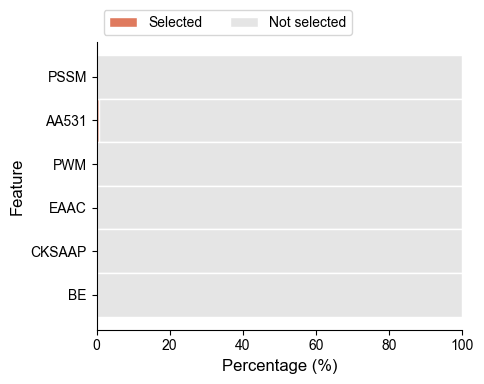

In [19]:
category_names = ['Selected', 'Not selected']

results = {
    'PSSM':np.array([selected_percent[0],not_selected_percent[0]]), 
    'AA531':np.array([selected_percent[1],not_selected_percent[1]]), 
    'PWM':np.array([selected_percent[2],not_selected_percent[2]]), 
    'EAAC':np.array([selected_percent[3],not_selected_percent[3]]), 
    'CKSAAP':np.array([selected_percent[4],not_selected_percent[4]]), 
    'BE':np.array([selected_percent[5],not_selected_percent[5]])
}

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    #category_colors = ['#82B29A', '#E5E5E5']
    category_colors = ['#DF7A5E', '#E5E5E5']
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['font.size'] = 12
    fig, ax = plt.subplots(figsize=(5, 4))  # 调整图形尺寸

    ax.tick_params(axis='x', labelsize=10)  # 调整X轴刻度字体大小为10
    ax.tick_params(axis='y', labelsize=10)  # 调整Y轴刻度字体大小为10

    ax.invert_yaxis()

    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):

        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=1,
                        label=colname, color=color, edgecolor='white')

        #text_color = 'black'
        #ax.bar_label(rects, labels=widths, label_type='center', color=text_color, fontsize=8)  # 添加标签并设置字体大小

    
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
    
    ax.set_ylabel('Feature')  # 添加Y轴标签
    ax.set_xlabel('Percentage (%)')  # 添加X轴标签
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()  # 调整图形布局

    return fig, ax


survey(results, category_names)
plt.savefig('human_ElasticNet_feature_proportion.pdf', format='pdf', dpi=1200)  # 保存为EPS格式的向量图，并设置dpi
plt.show()